# Data Camp

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
!ls "gdrive/My Drive/DataCamp/Data"

sample_submission.csv		 submission_SMOTE_rf.csv
submission_balnaced_Bagging.csv  submission_SMOTETomek_rf.csv
submission.csv			 test_identity.csv
submission_oversamp_rf.csv	 test_transaction.csv
submission_rf_undersampling.csv  train_identity.csv
submission_RUSBoost.csv		 train_transaction.csv
Submissions


In [0]:
directory = "gdrive/My Drive/DataCamp/Data"

train_trans = pd.read_csv(''.join((directory, '/train_transaction.csv')))
train_id = pd.read_csv(''.join((directory, '/train_identity.csv')))

test_trans = pd.read_csv(''.join((directory, '/test_transaction.csv')))
test_id = pd.read_csv(''.join((directory, '/test_identity.csv')))

In [5]:
print(f'shape of train transaction df : {train_trans.shape}')
print(f'shape of train identity df : {train_id.shape}')

shape of train transaction df : (590540, 394)
shape of train identity df : (144233, 41)


In [7]:
cat_trans = ['ProductCD', 'R_emaildomain', 'P_emaildomain', 'addr1', 'addr2']
for i in range(1, 7): cat_trans.append('card'+str(i))
for i in range(1, 10): cat_trans.append('M'+str(i))
for col in cat_trans:
  print(col, train_trans[col].dtypes, f', {len(train_trans[col].unique())} unique values')
  print(train_trans[col].unique(), '\n')

ProductCD object , 5 unique values
['W' 'H' 'C' 'S' 'R'] 

R_emaildomain object , 61 unique values
[nan 'gmail.com' 'hotmail.com' 'outlook.com' 'anonymous.com' 'charter.net'
 'prodigy.net.mx' 'comcast.net' 'live.com.mx' 'icloud.com' 'yahoo.com'
 'aol.com' 'juno.com' 'att.net' 'verizon.net' 'yahoo.com.mx'
 'bellsouth.net' 'servicios-ta.com' 'ymail.com' 'hotmail.es' 'msn.com'
 'optonline.net' 'live.com' 'gmx.de' 'aim.com' 'mail.com' 'me.com'
 'outlook.es' 'cox.net' 'earthlink.net' 'embarqmail.com' 'web.de'
 'sbcglobal.net' 'scranton.edu' 'mac.com' 'twc.com' 'roadrunner.com'
 'yahoo.fr' 'yahoo.de' 'yahoo.es' 'frontiernet.net' 'gmail' 'live.fr'
 'q.com' 'yahoo.co.uk' 'windstream.net' 'suddenlink.net' 'hotmail.fr'
 'ptd.net' 'hotmail.de' 'frontier.com' 'cfl.rr.com' 'hotmail.co.uk'
 'netzero.com' 'netzero.net' 'yahoo.co.jp' 'rocketmail.com'
 'centurylink.net' 'protonmail.com' 'cableone.net' 'sc.rr.com'] 

P_emaildomain object , 60 unique values
[nan 'gmail.com' 'outlook.com' 'yahoo.com' 'mai

In [8]:
cat_id = ['DeviceType', 'DeviceInfo']
for i in range(12, 39): cat_id.append('id_'+str(i))
for col in cat_id : 
  print(col, train_id[col].dtypes, f', {len(train_id[col].unique())} unique values')
  print(train_id[col].unique(), '\n')

DeviceType object , 3 unique values
['mobile' 'desktop' nan] 

DeviceInfo object , 1787 unique values
['SAMSUNG SM-G892A Build/NRD90M' 'iOS Device' 'Windows' ...
 'LDN-LX3 Build/HUAWEILDN-LX3' 'Z955A' 'LG-E975'] 

id_12 object , 2 unique values
['NotFound' 'Found'] 

id_13 float64 , 55 unique values
[nan 49. 52. 14. 20. 55. 43. 18. 41. 63. 61. 35. 25. 39. 57. 15. 11. 44.
 62. 59. 28. 24. 51. 60. 54. 36. 38. 31. 56. 58. 22. 50. 32. 45. 48. 23.
 30. 17. 13. 37. 21. 46. 10. 26. 53. 34. 47. 33. 40. 29. 19. 64. 12. 27.
 42.] 

id_14 float64 , 26 unique values
[-480. -300.   nan -360. -420. -540. -600.  480. -240.  300. -180.   60.
    0.  180.  540.  600.  420.  270.  120.  240.  330. -120.  360.  720.
 -660. -210.] 

id_15 object , 4 unique values
['New' 'Found' nan 'Unknown'] 

id_16 object , 3 unique values
['NotFound' 'Found' nan] 

id_17 float64 , 105 unique values
[166. 121. 225.  nan 102. 148. 199. 146. 144. 133. 100. 130. 218. 150.
 195. 153. 159. 142. 210. 200. 118. 122. 149. 189. 

Fraudulent transactions ratio:3.5%


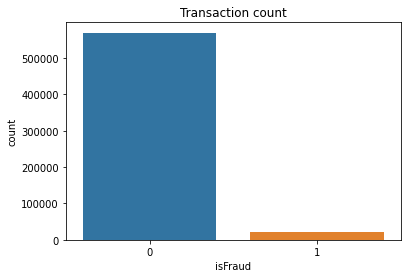

In [9]:
print(f"Fraudulent transactions ratio:{round(train_trans['isFraud'].mean()*100, 2)}%")
sns.countplot(x='isFraud', data=train_trans)
plt.title('Transaction count')
plt.show()

In [0]:
train = train_trans.merge(train_id, on='TransactionID', how='left')
test = test_trans.merge(test_id, on='TransactionID', how='left')

In [0]:
del train_id
del train_trans
del test_id
del test_trans

In [12]:
train.shape, test.shape

((590540, 434), (506691, 433))

In [13]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [14]:
test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-12,id-13,id-14,id-15,id-16,id-17,id-18,id-19,id-20,id-21,id-22,id-23,id-24,id-25,id-26,id-27,id-28,id-29,id-30,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,4.0,NaN,aol.com,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,NaN,231.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,472.0,87.0,2635.0,NaN,hotmail.com,NaN,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,NaN,NaN,NaN,NaN,136.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,205.0,87.0,17.0,NaN,gmail.com,NaN,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,NaN,NaN,NaN,NaN,242.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,87.0,6.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,NaN,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
test.columns = test.columns.str.replace("-", "_")

In [16]:
test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,4.0,NaN,aol.com,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,NaN,231.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,472.0,87.0,2635.0,NaN,hotmail.com,NaN,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,NaN,NaN,NaN,NaN,136.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,205.0,87.0,17.0,NaN,gmail.com,NaN,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,NaN,NaN,NaN,NaN,242.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,87.0,6.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,NaN,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Transaction DT

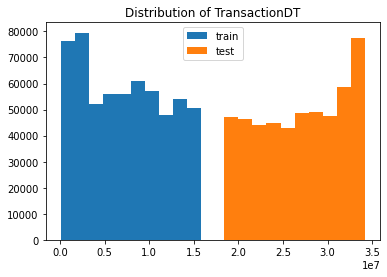

In [17]:
plt.hist(train['TransactionDT'], label = 'train')
plt.hist(test['TransactionDT'], label = 'test')
plt.title('Distribution of TransactionDT')
plt.legend()
plt.show()

In [18]:
# nb of s in a day 60*60*24
round(train['TransactionDT'].min() / (60 * 60 * 24)), round(train['TransactionDT'].max()/(60 * 60 * 24))

(1, 183)

In [19]:
round(test['TransactionDT'].min() / (60 * 60 * 24)), round(test['TransactionDT'].max()/(60 *60 * 24))

(213, 396)

The TransactionDT feature is a timedelta from a given reference datetime (not an actual timestamp). (from day 1 to day 183 for train data and from day 213 to day 396)

**cross validation technique => TimeSeriesSplit**

### Transaction Amount

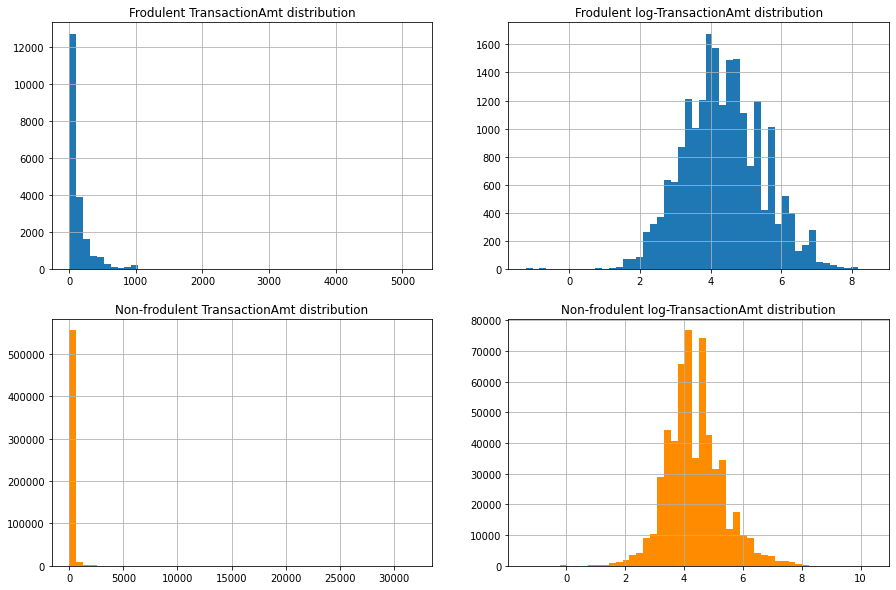

In [20]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.hist(train.loc[train['isFraud'] == 1]['TransactionAmt'], bins=50)
plt.title('Frodulent TransactionAmt distribution')
plt.grid()
plt.subplot(2, 2, 2)
plt.hist(train.loc[train['isFraud'] == 1]['TransactionAmt'].apply(np.log), bins=50)
plt.title('Frodulent log-TransactionAmt distribution')
plt.grid()
plt.subplot(2, 2, 3)
plt.hist(train.loc[train['isFraud'] == 0]['TransactionAmt'], color='darkorange', bins=50)
plt.title('Non-frodulent TransactionAmt distribution')
plt.grid()
plt.subplot(2, 2, 4)
plt.hist(train.loc[train['isFraud'] == 0]['TransactionAmt'].apply(np.log), bins=50, color='darkorange')
plt.title('Non-frodulent log-TransactionAmt distribution')
plt.grid()
plt.show()

In [21]:
train.loc[train['isFraud'] == 1]['TransactionAmt'].describe()

count    20663.000000
mean       149.244779
std        232.212163
min          0.292000
25%         35.044000
50%         75.000000
75%        161.000000
max       5191.000000
Name: TransactionAmt, dtype: float64

In [22]:
train.loc[train['isFraud'] == 0]['TransactionAmt'].describe()

count    569877.000000
mean        134.511665
std         239.395078
min           0.251000
25%          43.970000
50%          68.500000
75%         120.000000
max       31937.391000
Name: TransactionAmt, dtype: float64

### Product CD

type Categorical

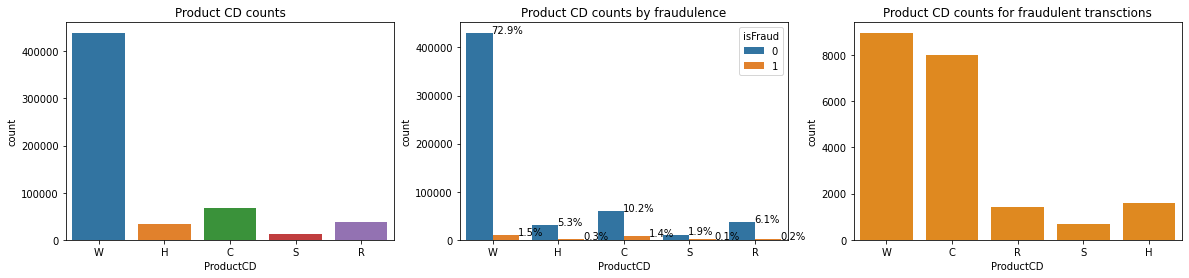

In [24]:
plt.figure(figsize=(20, 4))
plt.subplot(1, 3, 1)
sns.countplot(x='ProductCD', data = train)
plt.title('Product CD counts')
plt.subplot(1, 3, 2)
ax = sns.countplot(x='ProductCD', hue='isFraud', data = train)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/train.shape[0])
        x = p.get_x() + p.get_width() - 0.02
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))
plt.title('Product CD counts by fraudulence')
plt.subplot(1, 3, 3)
sns.countplot(x='ProductCD', data = train.loc[train['isFraud']==1], color = 'darkorange')
plt.title('Product CD counts for fraudulent transctions')
plt.show()

### Card features


Categorical (card1 --> card6)


In [26]:
train[['card1', 'card2', 'card3', 'card4', 'card5', 'card6']].dtypes

card1      int64
card2    float64
card3    float64
card4     object
card5    float64
card6     object
dtype: object

In [27]:
train[['card1', 'card2', 'card3', 'card5']].describe()

,card1,card2,card3,card5
count,590540.000000,581607.000000,588975.000000,586281.000000
mean,9898.734658,362.555488,153.194925,199.278897
std,4901.170153,157.793246,11.336444,41.244453
min,1000.000000,100.000000,100.000000,100.000000
25%,6019.000000,214.000000,150.000000,166.000000
50%,9678.000000,361.000000,150.000000,226.000000
75%,14184.000000,512.000000,150.000000,226.000000
max,18396.000000,600.000000,231.000000,237.000000


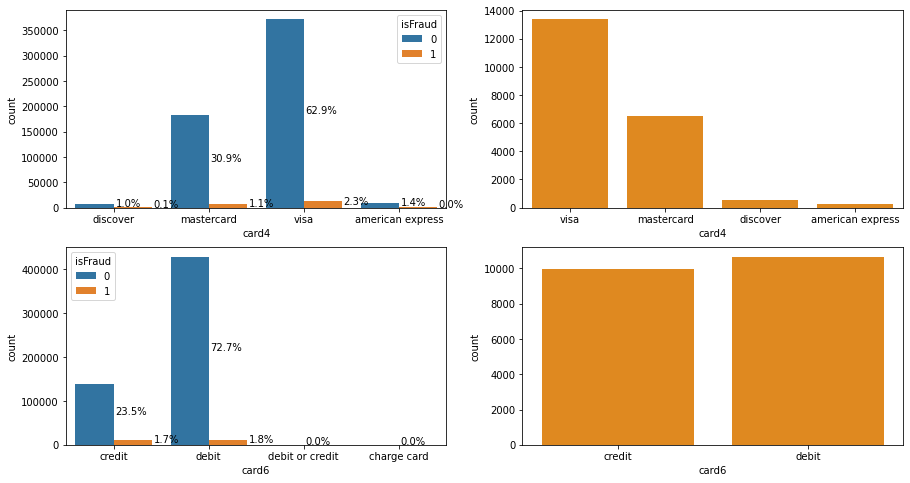

In [28]:
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
ax = sns.countplot('card4', hue='isFraud', data=train)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/train.shape[0])
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.subplot(2, 2, 2)
sns.countplot('card4', data=train.loc[train['isFraud']==1], color='darkorange')
plt.subplot(2, 2, 3)
ax = sns.countplot('card6', hue='isFraud', data=train)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/train.shape[0])
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.subplot(2, 2, 4)
sns.countplot('card6', data=train.loc[train['isFraud']==1], color='darkorange')
plt.show()

### Adress

Categorical

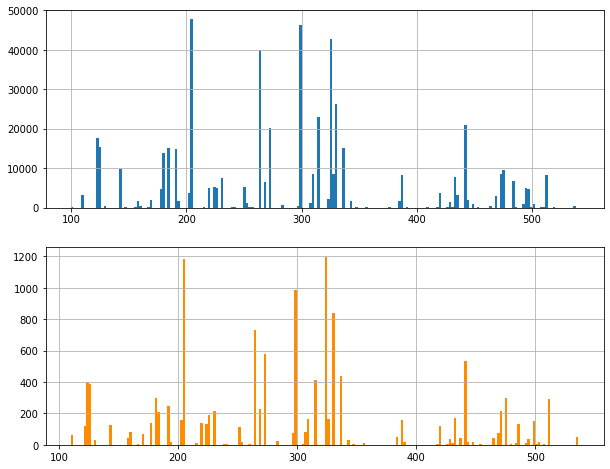

In [34]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
train['addr1'].hist(bins=200)
plt.subplot(2, 1, 2)
train.loc[train['isFraud']==1]['addr1'].hist(bins=200, color='darkorange')
plt.show()

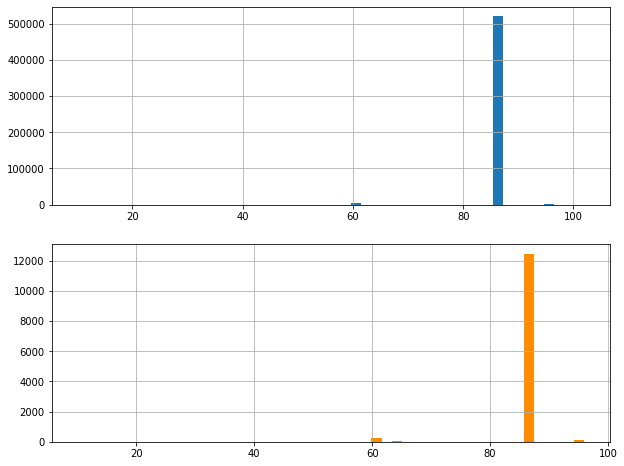

In [35]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
train['addr2'].hist(bins=50)
plt.subplot(2, 1, 2)
train.loc[train['isFraud']==1]['addr2'].hist(bins=50, color='darkorange')
plt.show()

### dist

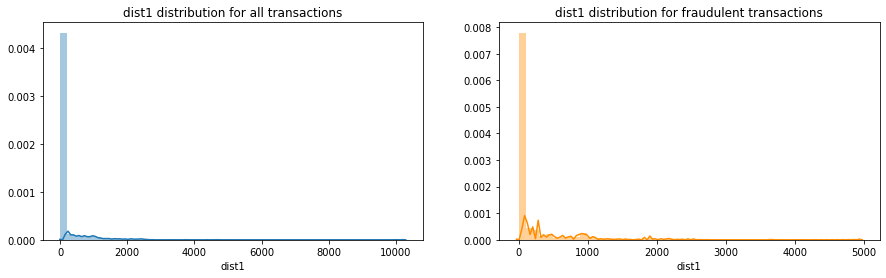

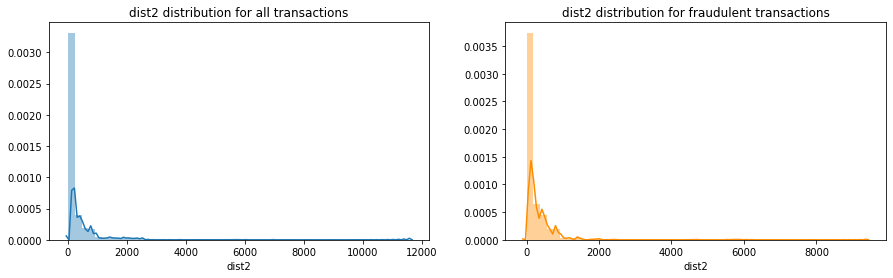

In [36]:
plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
sns.distplot(train['dist1'])
plt.title('dist1 distribution for all transactions')
plt.subplot(1, 2, 2)
sns.distplot(train.loc[train['isFraud']==1]['dist1'], color='darkorange')
plt.title('dist1 distribution for fraudulent transactions')

plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
sns.distplot(train['dist2'])
plt.title('dist2 distribution for all transactions')
plt.subplot(1, 2, 2)
sns.distplot(train.loc[train['isFraud']==1]['dist2'], color='darkorange')
plt.title('dist2 distribution for fraudulent transactions')
plt.show()

### Emaildomain


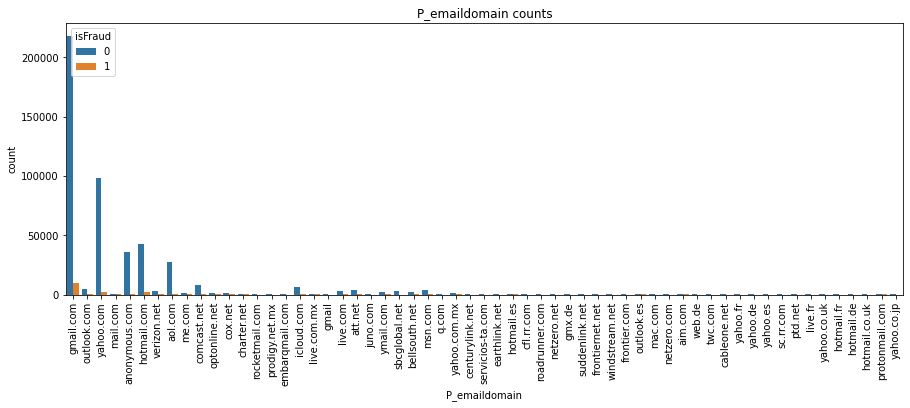

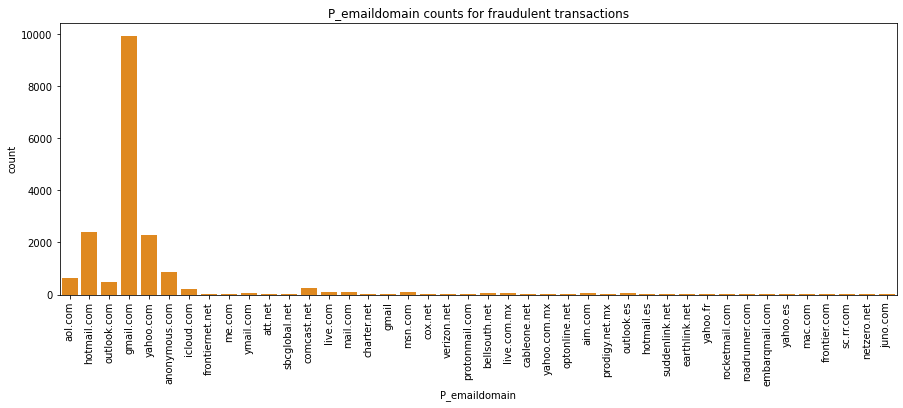

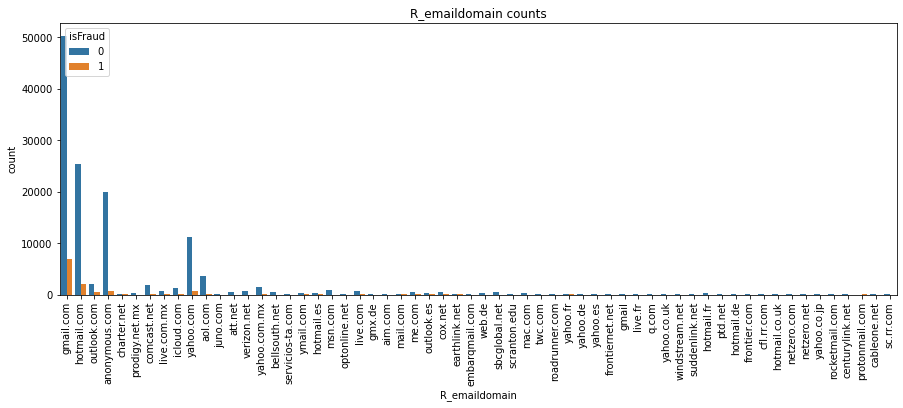

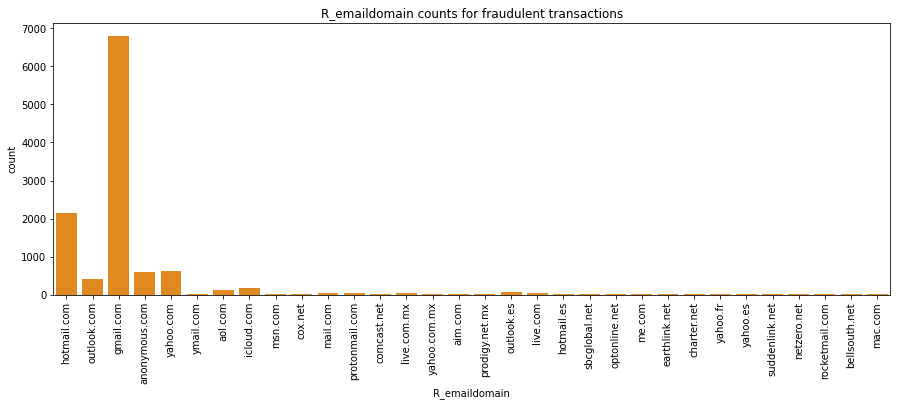

In [37]:
plt.figure(figsize=(15,5))
sns.countplot('P_emaildomain', hue='isFraud', data=train)
plt.xticks(rotation=90)
plt.title('P_emaildomain counts')
plt.show()

plt.figure(figsize=(15,5))
sns.countplot('P_emaildomain', data=train.loc[train['isFraud']==1], color='darkorange')#, hue='isFraud', data=train)
plt.xticks(rotation=90)
plt.title('P_emaildomain counts for fraudulent transactions')
plt.show()

plt.figure(figsize=(15,5))
sns.countplot('R_emaildomain', hue='isFraud', data=train)
plt.xticks(rotation=90)
plt.title('R_emaildomain counts')
plt.show()

plt.figure(figsize=(15,5))
sns.countplot('R_emaildomain', data=train.loc[train['isFraud']==1], color='darkorange')#, hue='isFraud', data=train)
plt.xticks(rotation=90)
plt.title('R_emaildomain counts for fraudulent transactions')
plt.show()

### C columns

In [0]:
C_cols = ['C' + str(i) for i in range(1, 15)]

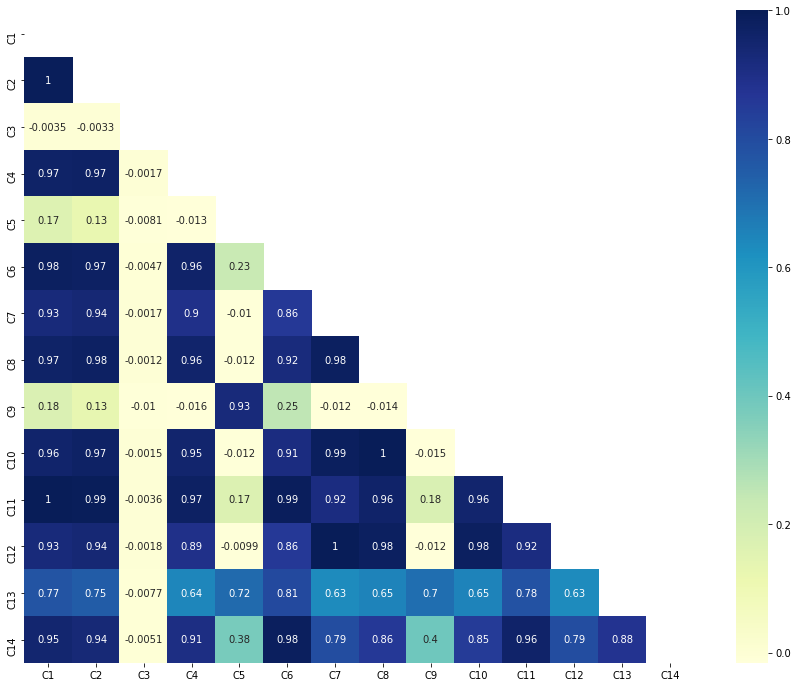

In [39]:
plt.figure(figsize=(15, 12))
matrix = np.triu(train[C_cols].corr())
sns.heatmap(train[C_cols].corr(), annot=True, fmt='.2g', mask=matrix, cmap="YlGnBu")
plt.show()

### D columns

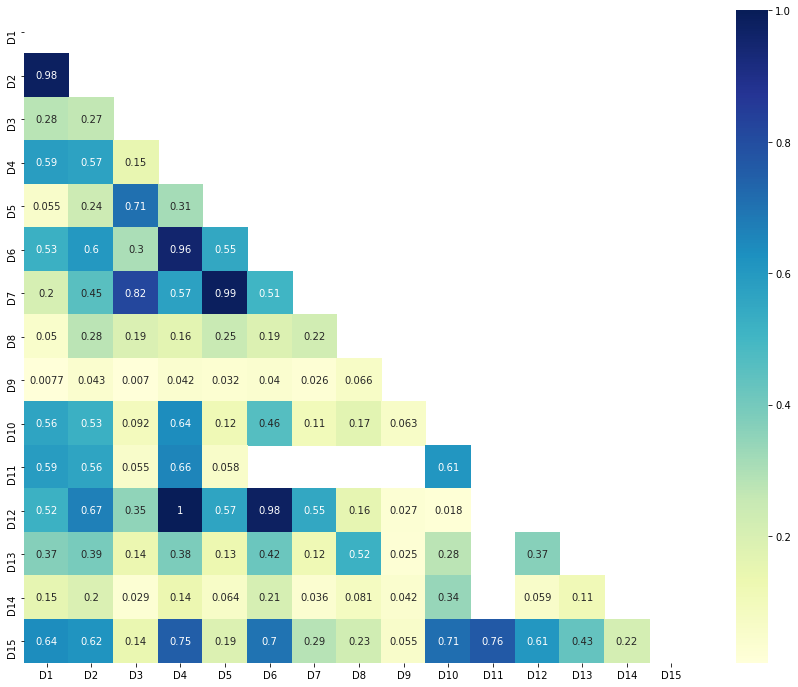

In [76]:
D_cols = ['D' + str(i) for i in range(1, 16)]
plt.figure(figsize=(15, 12))
matrix = np.triu(train[D_cols].corr())
sns.heatmap(train[D_cols].corr(), annot=True, fmt='.2g', mask=matrix, cmap="YlGnBu")
plt.show()

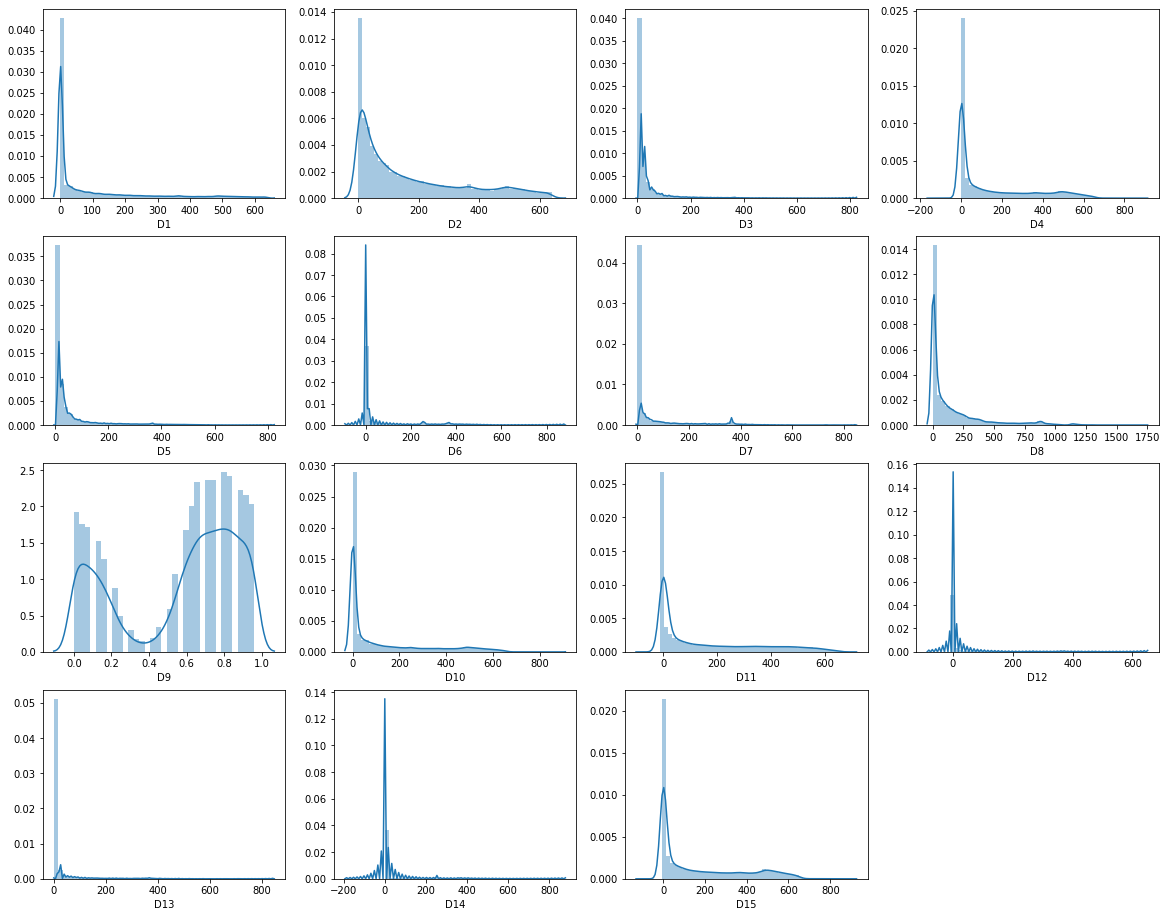

In [41]:
plt.figure(figsize=(20, 16))
for i in range(1, 16):
  plt.subplot(4, 4, i)
  sns.distplot(train['D'+str(i)])
plt.show()

### M columns

Categorical

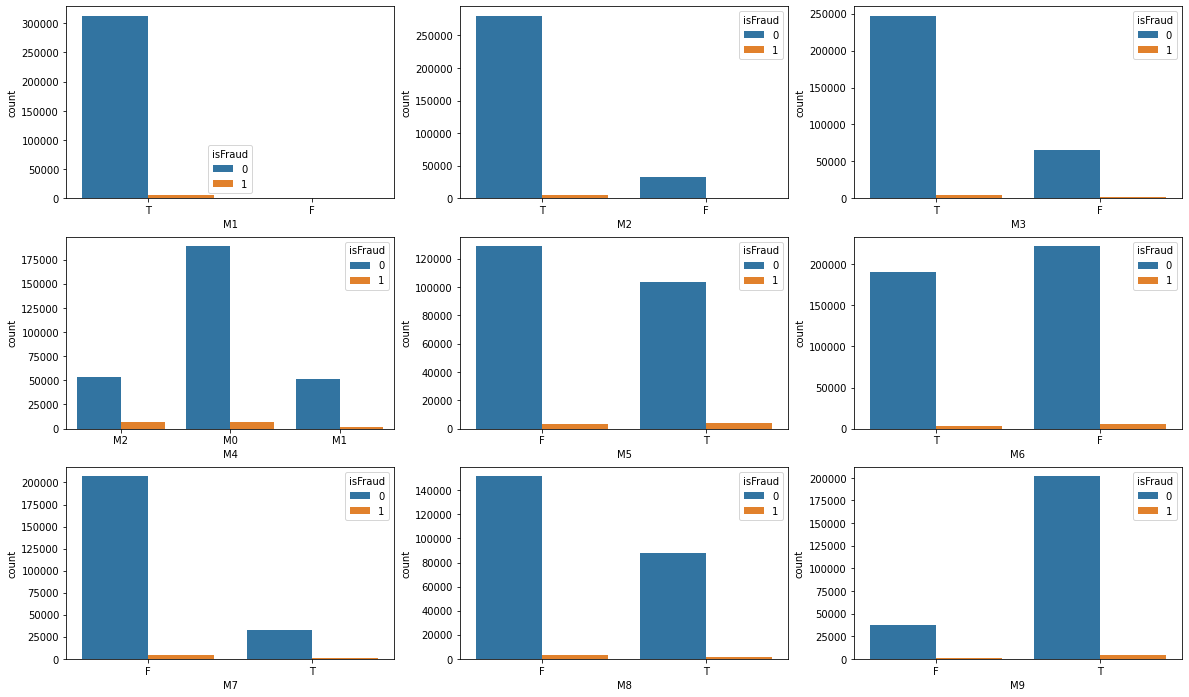

In [42]:
plt.figure(figsize=(20, 12))
for i in range(1, 10):
  plt.subplot(3, 3, i)
  sns.countplot('M'+str(i), hue='isFraud', data=train)
plt.show()
  

### V columns

In [0]:
V_cols = [col for col in train.columns if 'V' in col]

In [44]:
train[V_cols].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,421571.000000,421571.000000,421571.000000,421571.00000,421571.000000,421571.000000,...,589271.000000,589271.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,589271.000000,589271.000000,589271.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
mean,0.999945,1.045204,1.078075,0.846456,0.876991,1.045686,1.072870,1.027704,1.041529,0.463915,0.478987,0.559711,0.599166,0.999500,0.122342,0.123460,0.134040,0.135363,0.816371,0.847843,0.129684,0.132292,1.034791,1.058097,0.977660,0.988040,0.000776,0.000830,0.387840,0.406436,0.140761,0.142417,0.130693,0.139154,0.542594,0.579198,1.108065,1.16240,0.166076,0.177145,...,0.045507,0.052002,0.251761,0.283140,0.264208,1.000007,139.748713,408.682375,230.413180,10.995986,118.195658,4.202175,39.173910,21.351473,43.319174,26.806977,109.818544,247.606741,162.153398,18.372476,42.073133,28.326584,6.220289,13.103775,9.184612,0.058494,0.851040,0.296633,0.336790,1.312844,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,0.007390,0.240133,0.320890,0.440053,0.475902,0.239385,0.304779,0.186069,0.226339,0.521522,0.552431,0.510533,0.532185,0.022345,0.332422,0.342841,0.364456,0.371763,0.425512,0.459451,0.339060,0.359415,0.247681,0.305485,0.185245,0.209302,0.028596,0.031133,0.510652,0.554311,0.355793,0.368278,0.340900,0.357549,0.516010,0.539039,0.690571,0.85892,0.451956,0.505786,...,0.289573,0.318310,0.481889,0.623608,0.528238,0.002603,2348.849634,4391.992977,3021.924247,116.254277,352.983093,102.374938,172.128339,95.902970,173.619028,116.853222,2270.033202,3980.042828,2793.343636,332.304848,473.499307,382.053171,56.022561,106.739813,73.627893,0.304415,3.950295,1.364356,1.580144,8.769083,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.0000

In [45]:
len([col for col in V_cols if train[col].isnull().sum()/train.shape[0] > 0.8])

47

### DeviceType

Categorical

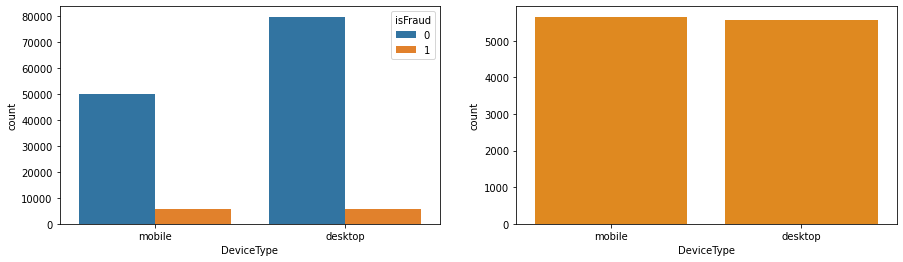

In [46]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
sns.countplot('DeviceType', hue='isFraud', data=train)
plt.subplot(1, 2, 2)
sns.countplot('DeviceType', data=train.loc[train['isFraud']==1], color='darkorange')
plt.show()

### DeviceInfo
Categorical

In [47]:
train[['DeviceInfo']].head()

,DeviceInfo
0,NaN
1,NaN
2,NaN
3,NaN
4,SAMSUNG SM-G892A Build/NRD90M


In [48]:
len(train['DeviceInfo'].unique())

1787

In [49]:
train['DeviceInfo'].isnull().sum()

471874

### id columns

$12, \ldots, 38$ categorical

In [50]:
ids = []
for i in range(12, 39):
  if len(train['id_'+str(i)].unique()) < 6 :
    ids.append(i)
len(ids), ids

(13, [12, 15, 16, 23, 27, 28, 29, 32, 34, 35, 36, 37, 38])

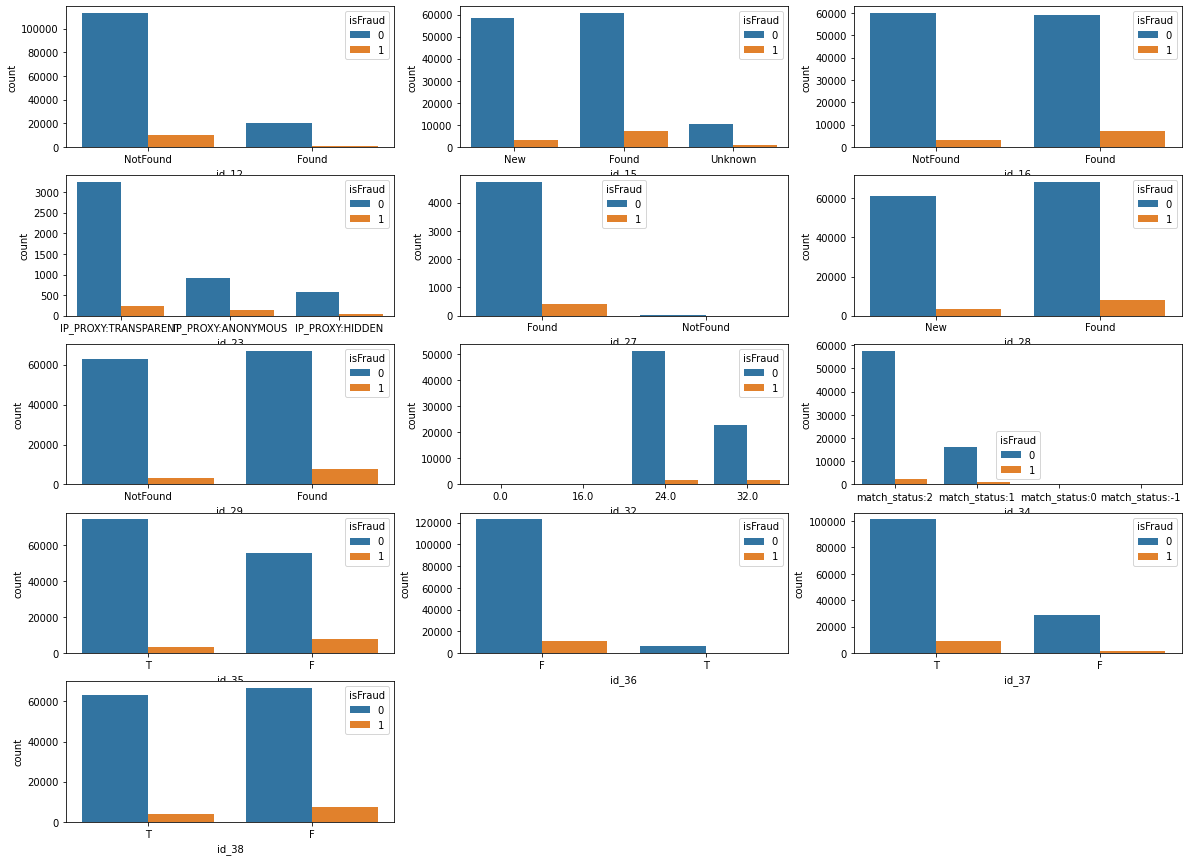

In [51]:
plt.figure(figsize=(20, 15))
for i, k in enumerate(ids):
  plt.subplot(5, 3, i+1)
  sns.countplot('id_'+str(k), hue='isFraud', data=train)

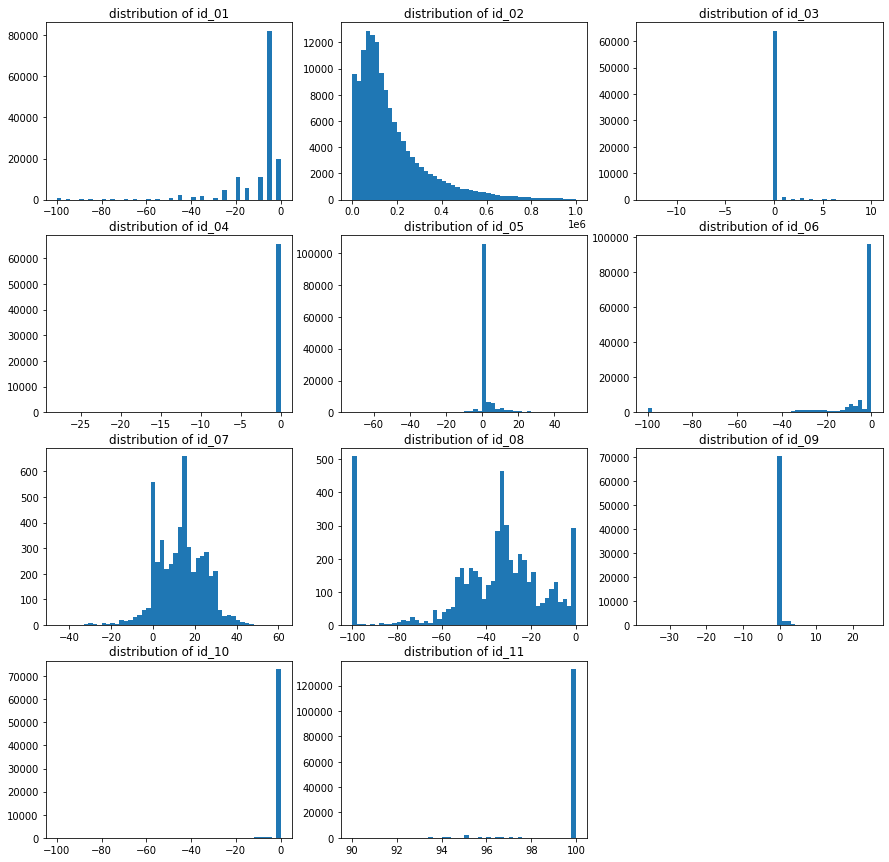

In [52]:
plt.figure(figsize=(15, 15))
for i in range(1, 12):
    plt.subplot(4, 3, i)
    if i < 10 :
        plt.hist(train['id_0'+str(i)], bins=50)
        plt.title(f'distribution of id_0{str(i)}')
    else:
        plt.hist(train['id_'+str(i)], bins=50)
        plt.title(f'distribution of id_{str(i)}')

## DATA ENG

`useful_features` we decided to keep are obtained using undersampled data and a random forest model according to their feature importance.

In [0]:
useful_features = ['TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1',
                   'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13',
                   'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M2', 'M3',
                   'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V17',
                   'V19', 'V20', 'V29', 'V30', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V40', 'V44', 'V45', 'V46', 'V47', 'V48',
                   'V49', 'V51', 'V52', 'V53', 'V54', 'V56', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V69', 'V70', 'V71',
                   'V72', 'V73', 'V74', 'V75', 'V76', 'V78', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V87', 'V90', 'V91', 'V92',
                   'V93', 'V94', 'V95', 'V96', 'V97', 'V99', 'V100', 'V126', 'V127', 'V128', 'V130', 'V131', 'V138', 'V139', 'V140',
                   'V143', 'V145', 'V146', 'V147', 'V149', 'V150', 'V151', 'V152', 'V154', 'V156', 'V158', 'V159', 'V160', 'V161',
                   'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V169', 'V170', 'V171', 'V172', 'V173', 'V175', 'V176', 'V177',
                   'V178', 'V180', 'V182', 'V184', 'V187', 'V188', 'V189', 'V195', 'V197', 'V200', 'V201', 'V202', 'V203', 'V204',
                   'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V219', 'V220',
                   'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V231', 'V233', 'V234', 'V238', 'V239',
                   'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V249', 'V251', 'V253', 'V256', 'V257', 'V258', 'V259', 'V261',
                   'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276',
                   'V277', 'V278', 'V279', 'V280', 'V282', 'V283', 'V285', 'V287', 'V288', 'V289', 'V291', 'V292', 'V294', 'V303',
                   'V304', 'V306', 'V307', 'V308', 'V310', 'V312', 'V313', 'V314', 'V315', 'V317', 'V322', 'V323', 'V324', 'V326',
                   'V329', 'V331', 'V332', 'V333', 'V335', 'V336', 'V338', 'id_01', 'id_02', 'id_03', 'id_05', 'id_06', 'id_09',
                   'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_17', 'id_19', 'id_20', 'id_30', 'id_31', 'id_32', 'id_33',
                   'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']

train = train[useful_features + ['isFraud', 'TransactionID', 'TransactionDT']]
test  = test[useful_features + ['TransactionID', 'TransactionDT']]

In [0]:
# New feature corresponding to the log transform of the transaction amount

train['logTransactionAmt'] = train['TransactionAmt'].apply(np.log)
test['logTransactionAmt']  = test['TransactionAmt'].apply(np.log)

In [0]:
# New feature corresponding to the decimal part of the transaction amount, maybe the fraudsters tend to have exact amounts. 
# What is wrong with a decimal part's lenght being 3 and more sings? Maybe it is due to a currency convertion!!!
# It's a track to explore!

train['logTransactionAmt'] = ((train['TransactionAmt'] - round(train['TransactionAmt'])) * 1000).astype(int)
test['logTransactionAmt']  = ((test['TransactionAmt'] - round(test['TransactionAmt'])) * 1000).astype(int)

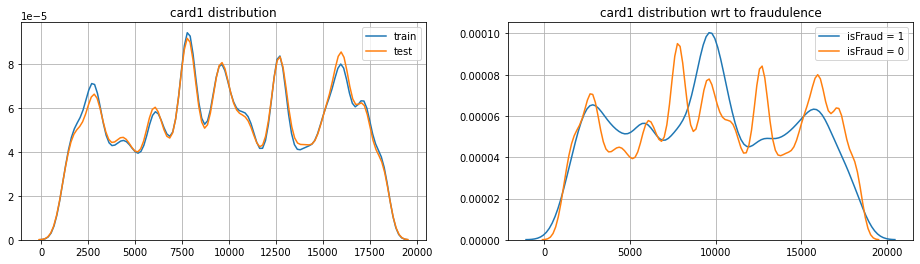

In [91]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
sns.kdeplot(train['card1'], label='train')
sns.kdeplot(test['card1'], label='test')
plt.title('card1 distribution')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
sns.kdeplot(train.loc[train['isFraud']==1]['card1'], label='isFraud = 1')
sns.kdeplot(train.loc[train['isFraud']==0]['card1'], label='isFraud = 0')
plt.title('card1 distribution wrt to fraudulence')
plt.legend()
plt.grid()
plt.show()

In [92]:
train['card1'].isnull().sum()

0

Since `card1` is not a drifting variable we can count its occurence in both train and test sets:

In [0]:
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.model_selection import train_test_split
 from sklearn.metrics import roc_auc_score
 from sklearn.preprocessing import LabelEncoder
 import lightgbm as lgb

In [0]:
def covariate_shift(feature):
    df_feature_train = pd.DataFrame(data={feature: train[feature], 'isTest': 0})
    df_feature_test = pd.DataFrame(data={feature: test[feature], 'isTest': 1})
    df = pd.concat([df_feature_train, df_feature_test], ignore_index=True)

    if str(df[feature].dtype) in ['object', 'category']:
        df[feature] = LabelEncoder().fit_transform(df[feature].astype(str))
    
    X_train, X_test, y_train, y_test = train_test_split(df[feature], df['isTest'], test_size=0.25, stratify=df['isTest'])

    #clf = RandomForestClassifier(n_jobs=-1) #NaN problem!
    clf = lgb.LGBMClassifier(num_boost_round=500, n_jobs=-1)
    clf.fit(X_train.values.reshape(-1, 1), y_train)
    roc_auc =  roc_auc_score(y_test, clf.predict_proba(X_test.values.reshape(-1, 1))[:, 1])

    del df, df_feature_train, df_feature_test, X_train, y_train, X_test, y_test

    return roc_auc

In [139]:
covariate_shift('card1')

0.538997632614675

In [0]:
train['card1_count'] = train['card1'].map(pd.concat([train['card1'], test['card1']], ignore_index=True).value_counts(dropna=False))
test['card1_count']  = test['card1'].map(pd.concat([train['card1'], test['card1']], ignore_index=True).value_counts(dropna=False))

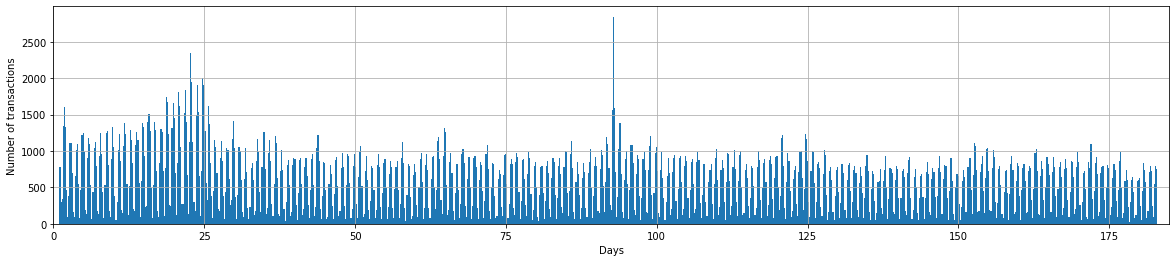

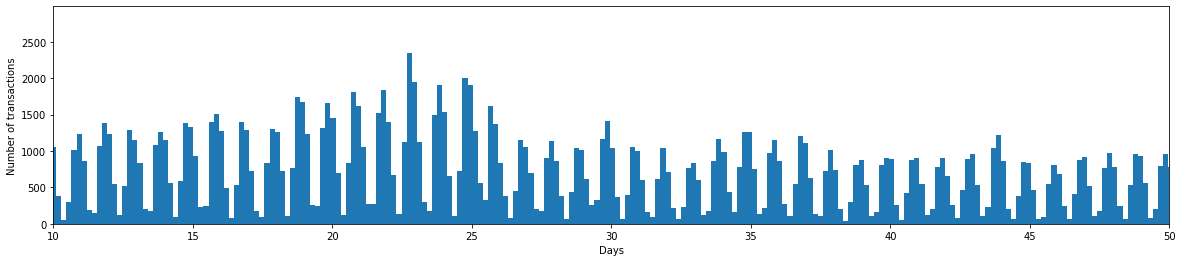

In [117]:
plt.figure(figsize=(20, 4))
plt.hist(train['TransactionDT'] / (3600*24), bins=1000)
plt.xlabel('Days')
plt.xlim(0, 185)
plt.ylabel('Number of transactions')
plt.grid()
plt.show()

# zoom
plt.figure(figsize=(20, 4))
plt.hist(train['TransactionDT'] / (3600*24), bins=1000)
plt.xlabel('Days')
plt.xlim(10, 50)
plt.ylabel('Number of transactions')
plt.show()

We have a kind of periodicity!

In [0]:
train['Transaction_day_of_week'] = np.floor((train['TransactionDT'] / (3600 * 24) - 1) % 7)
test['Transaction_day_of_week'] = np.floor((test['TransactionDT'] / (3600 * 24) - 1) % 7)

In [0]:
train['Transaction_hour'] = np.floor(train['TransactionDT'] / 3600) % 24
test['Transaction_hour'] = np.floor(test['TransactionDT'] / 3600) % 24

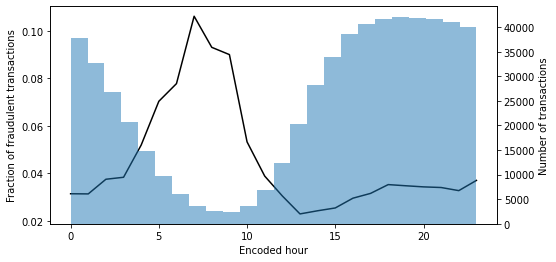

In [133]:
plt.figure(figsize=(8, 4))
plt.plot(train.groupby('Transaction_hour').mean()['isFraud'], c='k') # 'isFraud' in {0, 1}

ax = plt.gca() # get the axes of the previous plot
ax2 = ax.twinx() # create twin axes

_ = ax2.hist(train['Transaction_hour'], alpha=0.5, bins=24)
ax.set_xlabel('Encoded hour')
ax.set_ylabel('Fraction of fraudulent transactions')
ax2.set_ylabel('Number of transactions')
plt.show()

In [0]:
# arbitrary choice

for feature in ['id_02__id_20', 'id_02__D8', 'D11__DeviceInfo', 'DeviceInfo__P_emaildomain', 'P_emaildomain__C2', 
                'card2__dist1', 'card1__card5', 'card2__id_20', 'card5__P_emaildomain', 'addr1__card1']:

    feature1, feature2 = feature.split('__')
    train[feature] = train[feature1].astype(str) + '_' + train[feature2].astype(str)
    test[feature] = test[feature1].astype(str) + '_' + test[feature2].astype(str)

    le = LabelEncoder()
    le.fit(list(train[feature].astype(str).values) + list(test[feature].astype(str).values))
    train[feature] = le.transform(list(train[feature].astype(str).values))
    test[feature] = le.transform(list(test[feature].astype(str).values))

In [145]:
for feature in ['id_01', 'id_31', 'id_33', 'id_36']:
  print(f'{feature}, {covariate_shift(feature)}')

id_01, 0.5293985937052038
id_31, 0.6811964498359296
id_33, 0.5120617001503897
id_36, 0.5194995640200041


In [0]:
for feature in ['id_01',  'id_33', 'id_36']:
    if feature in useful_features:
        # Count encoded for both train and test
        train[feature + '_count'] = train[feature].map(pd.concat([train[feature], test[feature]], ignore_index=True).value_counts(dropna=False))
        test[feature + '_count'] = test[feature].map(pd.concat([train[feature], test[feature]], ignore_index=True).value_counts(dropna=False))
        
for feature in ['id_31']:
    if feature in useful_features:
        # Count encoded separately for train and test
        train[feature + '_count'] = train[feature].map(train[feature].value_counts(dropna=False))
        test[feature + '_count'] = test[feature].map(test[feature].value_counts(dropna=False))

In [0]:
for col in train.columns:
    if train[col].dtype == 'object':
        le = LabelEncoder()
        le.fit(list(train[col].astype(str).values) + list(test[col].astype(str).values))
        train[col] = le.transform(list(train[col].astype(str).values))
        test[col] = le.transform(list(test[col].astype(str).values))   

In [0]:
# sort TransactionDT to get a time serie and perform CV without adding a bias a.k.a forward looking bias

X = train.sort_values('TransactionDT').drop(['isFraud', 'TransactionDT', 'TransactionID'], axis=1)
y = train.sort_values('TransactionDT')['isFraud']
test = test.sort_values('TransactionDT').drop(['TransactionDT', 'TransactionID'], axis=1)

In [149]:
X.shape, test.shape

((590540, 297), (506691, 297))

In [0]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
from random import randint, random

In [0]:
params_dist = {'num_leaves': randint(1, 500),
          'min_child_weight': random(),
          'feature_fraction': random(),
          'bagging_fraction': random(),
          'min_data_in_leaf': randint(1, 200),
          'objective': 'binary',
          'max_depth': -1,
          'learning_rate': np.exp(-randint(1, 10)),
          "boosting_type": "gbdt",
          "bagging_seed": 11,
          "metric": 'auc',
          "verbosity": -1,
          'reg_alpha': random(),
          'reg_lambda': random()
         }

cv = TimeSeriesSplit(n_splits=5)
clf = lgb.LGBMClassifier(num_boost_round=best_iter)
n_iter_search = 100
random_search = RandomizedSearchCV(clf, params_distributions=params_dist, n_iter=n_iter_search, cv=cv)

In [0]:
random_seach.fit(X, y)

In [0]:
print(random_search.best_params_)

In [0]:
params = {'num_leaves': 491,
          'min_child_weight': 0.03454472573214212,
          'feature_fraction': 0.3797454081646243,
          'bagging_fraction': 0.4181193142567742,
          'min_data_in_leaf': 106,
          'objective': 'binary',
          'max_depth': -1,
          'learning_rate': 0.006883242363721497,
          "boosting_type": "gbdt",
          "bagging_seed": 11,
          "metric": 'auc',
          "verbosity": -1,
          'reg_alpha': 0.3899927210061127,
          'reg_lambda': 0.6485237330340494,
          'random_state': 47
         }

![picture](https://drive.google.com/uc?id=1_NKJ6NsqWay-iSvXQcGgN5Q7tzUdMFZl)


Source : sklearn
(https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py)




In [159]:
from sklearn.model_selection import TimeSeriesSplit
from time import time
import datetime

folds = TimeSeriesSplit(n_splits=5) #CV on a Time Serie

aucs = []
feature_importances = pd.DataFrame()
feature_importances['feature'] = X.columns

training_start_time = time()
for fold, (trn_idx, test_idx) in enumerate(folds.split(X, y)):
    start_time = time()
    
    print(f'Training on fold {fold + 1}')

    trn_data = lgb.Dataset(X.iloc[trn_idx], label=y.iloc[trn_idx])
    val_data = lgb.Dataset(X.iloc[test_idx], label=y.iloc[test_idx])

    clf = lgb.train(params, trn_data, 10000, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds=500)
    
    feature_importances[f'fold_{fold + 1}'] = clf.feature_importance()
    aucs.append(clf.best_score['valid_1']['auc'])
    
    print(f'Fold {fold + 1} finished in {str(datetime.timedelta(seconds=time() - start_time))}')
print('-' * 30)
print('Training has finished.')
print(f'Total training time is {str(datetime.timedelta(seconds=time() - training_start_time))}')
print('Mean AUC:', np.mean(aucs))
print('-' * 30)

Training on fold 1
Training until validation scores don't improve for 500 rounds.
[1000]	training's auc: 0.999999	valid_1's auc: 0.906068
Early stopping, best iteration is:
[1272]	training's auc: 1	valid_1's auc: 0.906259
Fold 1 finished in 0:02:39.904463
Training on fold 2
Training until validation scores don't improve for 500 rounds.
[1000]	training's auc: 0.999964	valid_1's auc: 0.92438
Early stopping, best iteration is:
[757]	training's auc: 0.999663	valid_1's auc: 0.924827
Fold 2 finished in 0:03:53.725615
Training on fold 3
Training until validation scores don't improve for 500 rounds.
[1000]	training's auc: 0.999516	valid_1's auc: 0.916401
Early stopping, best iteration is:
[879]	training's auc: 0.999001	valid_1's auc: 0.916433
Fold 3 finished in 0:06:20.735182
Training on fold 4
Training until validation scores don't improve for 500 rounds.
[1000]	training's auc: 0.99808	valid_1's auc: 0.936922
Early stopping, best iteration is:
[1237]	training's auc: 0.999317	valid_1's auc: 0.

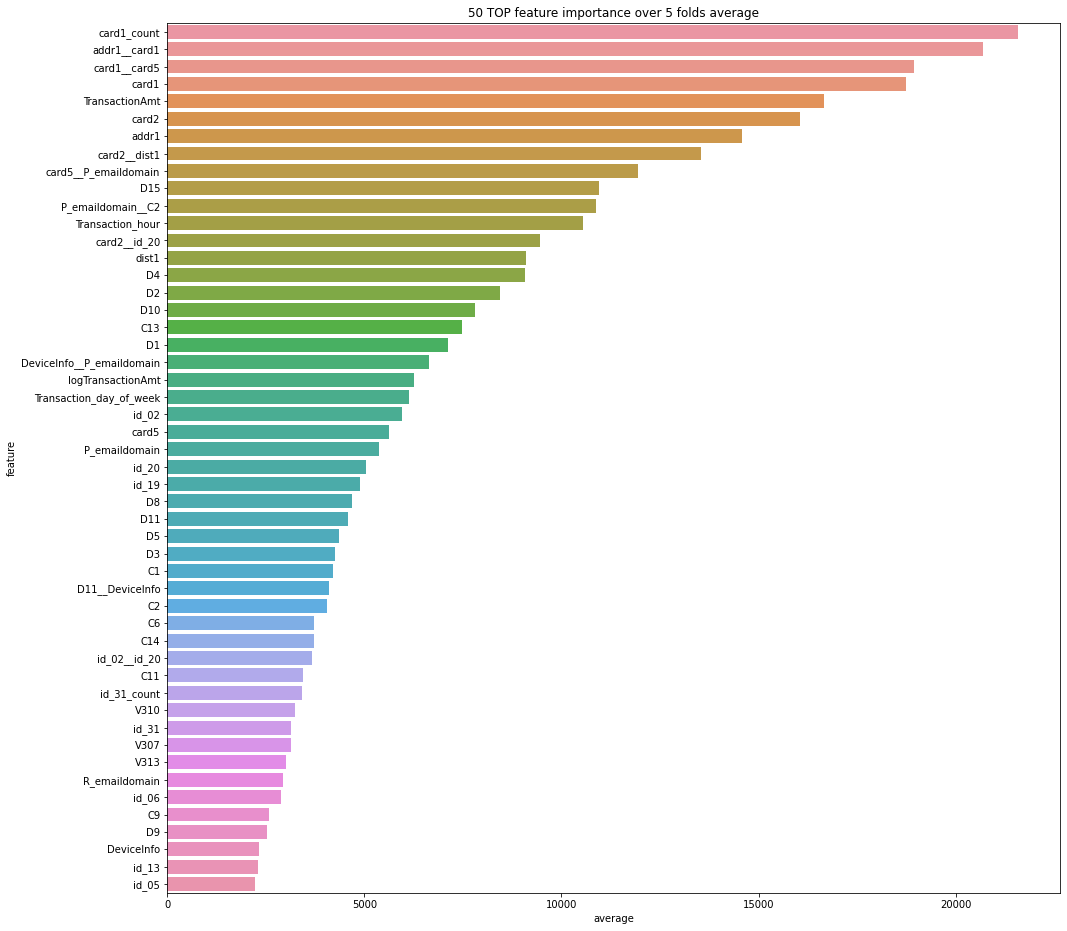

In [160]:
feature_importances['average'] = feature_importances[[f'fold_{fold + 1}' for fold in range(folds.n_splits)]].mean(axis=1)
feature_importances.to_csv(''.join((directory, 'feature_importances.csv')))

plt.figure(figsize=(16, 16))
sns.barplot(data=feature_importances.sort_values(by='average', ascending=False).head(50), x='average', y='feature')
plt.title(f'50 TOP feature importance over {folds.n_splits} folds average')
plt.show()

In [0]:
best_iter = clf.best_iteration

In [162]:
clf = lgb.LGBMClassifier(**params, num_boost_round=best_iter)
clf.fit(X, y)

LGBMClassifier(bagging_fraction=0.4181193142567742, bagging_seed=11,
               boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               feature_fraction=0.3797454081646243, importance_type='split',
               learning_rate=0.006883242363721497, max_depth=-1, metric='auc',
               min_child_samples=20, min_child_weight=0.03454472573214212,
               min_data_in_leaf=106, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_boost_round=1243, num_leaves=491,
               objective='binary', random_state=47,
               reg_alpha=0.3899927210061127, reg_lambda=0.6485237330340494,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0, verbosity=-1)

In [0]:
sub = pd.read_csv(''.join((directory, '/sample_submission.csv')))
sub['isFraud'] = clf.predict_proba(test)[:, 1]
sub.to_csv(''.join((directory, '/submission_lgbm_new_features.csv')), index=False)


**Public Score 0.941592**

**Private Score 0.914257**